In [237]:
import pandas as pd
import numpy as np
import json
import requests
import datetime as dt
pd.set_option('display.max_colwidth', -1)

# Gather

In [238]:
twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [239]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(r.content)

image_predictions = pd.read_csv("image_predictions.tsv",sep='\t')

In [240]:

selected_attr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets','timestamp'])


# Assess

In [241]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://

In [242]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id == 858860390427611136]
#twitter_archive_enhanced_new[twitter_archive_enhanced_new.tweet_id == 859196978902773760]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
171,8.588604e+17,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Winston. He knows he's a little too big for the swing, but he doesn't care. Kindly requests a push. 12/10 would happily…",8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326359670784/photo/1,12,10,Winston,None,None,None,None


In [243]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2355 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [244]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [245]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [246]:
tweet_selected_attr

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,20562,3261,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,12041,2158,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,56848,16716,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,28226,4429,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,32467,7711,Wed Jul 26 15:59:51 +0000 2017


In [247]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


# Clean

#### Quality
##### `twitter_archive_enhanced` table
- Remove tweets that do not have images - check
- Remove tweets that are retweets - check
- Change names that are incomplete - check
- Replace all URLS with https://twitter.com/dog_rates/status/'tweet_id' - check
- Convert tweet_id column from float64 to int - check
- Remove 881268444196462592 as it is not a dog - check
- Change name of expanded_url to tweet_link - check
- Remove twitter picture url from text field - check
- Remove the +0000 from the timestamp column - check

#### Tidiness
- Retweets are not appart of the *twitter_archive_enhanced* table. - Check
- Timestamp columns in *twitter_archive_enhanced* table duplicated in *tweet_selected_attr* table. - Check
- Remove `source`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns from the *twitter_archive_enhanced* table. - Check
- Combine the image_predictions with the twitter_archive_enhanced table

# Cleaning data:

### QUALITY:

#### Remove tweets without images in the text field

In [248]:
len(twitter_archive_enhanced.text.str.contains("http"))

2356

In [249]:
len(twitter_archive_enhanced.text)

2356

In [250]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains("http")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://

#### TEST: Check the length of the amount of rows

In [251]:
len(twitter_archive_enhanced.text)

2356

#### Remove tweets that are retweets: This is done by finding the rows where the 'text' column contains the String "RT @"

In [252]:
twitter_archive_enhanced_new = twitter_archive_enhanced[~twitter_archive_enhanced.text.str.contains("RT @")]
twitter_archive_enhanced_new
twitter_archive_enhanced_new.reset_index(drop=True, inplace=True)

#### Test

In [253]:
twitter_archive_enhanced_new[twitter_archive_enhanced_new['text'].str.contains('"RT @"')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Change names that are incomplete: This is done by finding all of the rows that contain all lowercased letters in the name column and changing them to "None"

In [254]:
twitter_archive_enhanced_new.loc[twitter_archive_enhanced_new['name'] == 'None'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 5 to 2174
Data columns (total 17 columns):
tweet_id                      680 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     680 non-null object
source                        680 non-null object
text                          680 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 622 non-null object
rating_numerator              680 non-null int64
rating_denominator            680 non-null int64
name                          680 non-null object
doggo                         680 non-null object
floofer                       680 non-null object
pupper                        680 non-null object
puppo                         680 non-null object
dtypes: float64(5), int64(2), object(10)
memory u

In [255]:
twitter_archive_enhanced_new.loc[twitter_archive_enhanced_new['name'].str[0].str.islower(), 'name'] = 'None'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test: Check if there are any lowercase values in the 'name' field aswell as count the number of 'None' values in the 'name' column

In [256]:
twitter_archive_enhanced_new.loc[twitter_archive_enhanced_new['name'] == 'None'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 5 to 2174
Data columns (total 17 columns):
tweet_id                      784 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     784 non-null object
source                        784 non-null object
text                          784 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 726 non-null object
rating_numerator              784 non-null int64
rating_denominator            784 non-null int64
name                          784 non-null object
doggo                         784 non-null object
floofer                       784 non-null object
pupper                        784 non-null object
puppo                         784 non-null object
dtypes: float64(5), int64(2), object(10)
memory u

In [257]:
twitter_archive_enhanced_new.loc[twitter_archive_enhanced_new['name'].str[0].str.islower()] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Replace all URLS with https://twitter.com/dog_rates/status/'tweet_id': This is done by concatenating the string 'https://twitter.com/dog_rates/status/' with the tweet_id at the end
#### Also changing the data type of tweet_id from float64 to int

In [258]:
twitter_archive_enhanced_new['tweet_id'] = twitter_archive_enhanced_new['tweet_id'].astype(int)
twitter_archive_enhanced_new['expanded_urls'] = 'https://twitter.com/dog_rates/status/' + twitter_archive_enhanced_new['tweet_id'].astype(str)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test: Check previous links that were not twitter links and or more than one URL.

I check the old dataframe for a link that contains gofund and it exists in the old dataframe, but does not exist in the new dataframe

In [259]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].str.contains("gofund", na=False)] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
27,8.867369e+17,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b",NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1",13,10,Mingus,None,None,None,None
73,8.784048e+17,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
75,8.782815e+17,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6",NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
97,8.733377e+17,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
98,8.732138e+17,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,NaN,NaN,NaN,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
114,8.706563e+17,NaN,NaN,2017-06-02 15:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/10\n\nHelp Cody here: https://t.co/4hxnDOt1CV https://t.co/42ryYRQ2Q4,NaN,NaN,NaN,"https://www.gofundme.com/help-fix-codys-torn-acl,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1",13,10,Cody,None,None,None,None
124,8.686395e+17,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT 

In [260]:
twitter_archive_enhanced_new[twitter_archive_enhanced_new['expanded_urls'].str.contains("gofund", na=False)] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Remove tweet_id 881268444196462592 as it is not a dog

In [261]:
twitter_archive_enhanced_new = twitter_archive_enhanced_new[twitter_archive_enhanced_new.tweet_id != 881268444196462592]

#### Test: Look up that specific Tweet ID

In [262]:
twitter_archive_enhanced_new[twitter_archive_enhanced_new.tweet_id == 881268444196462592]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Change name of expanded_url to tweet_link

In [263]:
twitter_archive_enhanced_new = twitter_archive_enhanced_new.rename(columns={"expanded_urls": "tweet_link"})

#### Test: Make sure that the column name was changed

In [264]:
twitter_archive_enhanced_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336192,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336192,13,10,Phineas,None,None,None,None
1,892177421306343424,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343424,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None
6,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913173991424,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None
9,890240255349198848,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much s

#### Remove twitter picture url from text field

In [265]:
twitter_archive_enhanced_new['text'] = twitter_archive_enhanced_new['text'].str.split('https').str[0]

#### Test: Look at text and confirm theres no links in the text field

In [266]:
twitter_archive_enhanced_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336192,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336192,13,10,Phineas,None,None,None,None
1,892177421306343424,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343424,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None
6,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913173991424,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None
9,890240255349198848,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198848,14,10,Cassie,doggo,None,None,None


#### Remove the +0000 from the timestamp column - convert that column to datetime

In [267]:
#twitter_archive_enhanced_new['timestamp'] = twitter_archive_enhanced_new['timestamp'].str.split('+000').str[0]

In [268]:
twitter_archive_enhanced_new['timestamp'] = pd.to_datetime(twitter_archive_enhanced_new['timestamp'], format='%Y-%m-%d %H:%M:%S')



#### TEST: Check the timestamp column and confirm there is no longer trailing '+0000' 

In [269]:
twitter_archive_enhanced_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336192,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336192,13,10,Phineas,None,None,None,None
1,892177421306343424,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343424,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None
6,890971913173991424,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913173991424,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None
9,890240255349198848,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198848,14,10,Cassie,doggo,None,None,None


### Tidiness:

#### Retweets are not appart of the *twitter_archive_enhanced* table.

In [270]:
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_new, tweet_selected_attr, how='inner', left_on='tweet_id', right_on='tweet_id')

#### TEST: Make sure the retweets and favorites are added to the dataframe.

In [271]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None,25461,4328,Mon Jul 31 00:18:03 +0000 2017
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None,42908,8964,Sun Jul 30 15:58:51 +0000 2017
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None,41048,9774,Sat Jul 29 16:00:24 +0000 2017
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None,20562,3261,Sat Jul 29 00:08:17 +0000 2017
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None,56848,16716,Fri Jul 28 00:22:40 +0000 2017
5,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None,28226,4429,Thu Jul 27 16:25:51 +0000 2017
6,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608113172480,13,10,Koda,None,None,None,None,31166,7624,Wed Jul 26 00:31:25 +0000 2017
7,889638837579907072,NaN,NaN,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837579907072,12,10,Ted,None,None,None,None,27672,4735,Tue Jul 25 00:10:02 +0000 2017
8,889278841981685760,NaN,NaN,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760,13,10,Oliver,None,None,None,None,25652,5637,Mon Jul 24 00:19:32 +0000 2017
9,888917238123831296,NaN,NaN,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</

#### Timestamp columns in *twitter_archive_enhanced* table duplicated in *tweet_selected_attr* table.

Drop the timestamp_y column and rename timestamp_x column to timestamp

In [272]:
twitter_archive_enhanced_clean.drop(['timestamp_y',], axis=1, inplace=True)

In [273]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={"timestamp_x": "timestamp"})

#### Test: check to see the timestamp_y column is gone and timestamp_x column is named timestamp

In [274]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None,25461,4328
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None,42908,8964
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None,41048,9774
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None,20562,3261
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None,56848,16716
5,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None,28226,4429
6,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608113172480,13,10,Koda,None,None,None,None,31166,7624
7,889638837579907072,NaN,NaN,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837579907072,12,10,Ted,None,None,None,None,27672,4735
8,889278841981685760,NaN,NaN,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760,13,10,Oliver,None,None,None,None,25652,5637
9,888917238123831296,NaN,NaN,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238123831296,12,10,Jim,None,None,None,None,29611,4709


#### Remove source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns from the *twitter_archive_enhanced_clean* table.

In [275]:
#twitter_archive_enhanced_clean
twitter_archive_enhanced_clean.drop(['source','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',], axis=1, inplace=True)




#### TEST: Confirm that those columns are dropped

In [276]:
twitter_archive_enhanced_clean

,tweet_id,timestamp,text,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None,25461,4328
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None,42908,8964
2,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None,41048,9774
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None,20562,3261
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None,56848,16716
5,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None,28226,4429
6,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek,https://twitter.com/dog_rates/status/890006608113172480,13,10,Koda,None,None,None,None,31166,7624
7,889638837579907072,2017-07-25 00:10:02,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist,https://twitter.com/dog_rates/status/889638837579907072,12,10,Ted,None,None,None,None,27672,4735
8,889278841981685760,2017-07-24 00:19:32,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek,https://twitter.com/dog_rates/status/889278841981685760,13,10,Oliver,None,None,None,None,25652,5637
9,888917238123831296,2017-07-23 00:22:39,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both,https://twitter.com/dog_rates/status/888917238123831296,12,10,Jim,None,None,None,None,29611,4709


In [277]:

image_predictions.drop(['jpg_url','img_num','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [278]:
twitter_archive_enhanced_final = pd.merge(twitter_archive_enhanced_clean, image_predictions, how='inner', left_on='tweet_id', right_on='tweet_id')

In [279]:
twitter_archive_enhanced_final

,tweet_id,timestamp,text,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None,25461,4328,Chihuahua,0.716012,True,malamute,0.078253,True
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None,42908,8964,paper_towel,0.170278,False,Labrador_retriever,0.168086,True
2,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None,41048,9774,basset,0.555712,True,English_springer,0.225770,True
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None,20562,3261,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None,56848,16716,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True
5,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None,28226,4429,Irish_terrier,0.487574,True,Irish_setter,0.193054,True
6,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek,https://twitter.com/dog_rates/status/890006608113172480,13,10,Koda,None,None,None,None,31166,7624,Samoyed,0.957979,True,Pomeranian,0.013884,True
7,889638837579907072,2017-07-25 00:10:02,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist,https://twitter.com/dog_rates/status/889638837579907072,12,10,Ted,None,None,None,None,27672,4735,French_bulldog,0.991650,True,boxer,0.002129,True
8,889278841981685760,2017-07-24 00:19:32,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek,https://twitter.com/dog_rates/status/889278841981685760,13,10,Oliver,None,None,None,None,25652,5637,whippet,0.626152,True,borzoi,0.194742,True
9,888917238123831296,2017-07-23 00:22:39,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both,https://twitter.com/dog_rates/status/888917238123831296,12,10,Jim,None,None,None,None,29611,4709,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True


# Analysis and Visualization

#### Finding the amount of True and Falses of p1_dog.

In [280]:
new_df = twitter_archive_enhanced_final[["p1_dog","p1"]]
new_df.groupby("p1_dog").count()

,p1
p1_dog,
False,340
True,959


#### Breaking down p1 and seeing the totals of each dog

In [281]:
new_df2 = twitter_archive_enhanced_final[["p1_dog","p1"]]
new_df2.groupby("p1").count().sort_values(['p1_dog'], ascending=False)

,p1_dog
p1,
golden_retriever,95
Pembroke,65
Labrador_retriever,62
Chihuahua,45
pug,39
Pomeranian,26
cocker_spaniel,22
chow,22
Samoyed,21


#### Finding the average rating of total dogs

In [282]:
twitter_archive_enhanced_final[['rating_numerator']].mean()

rating_numerator    12.843726
dtype: float64

In [292]:
twitter_archive_enhanced_final[['rating_numerator']].describe()

,rating_numerator
count,1299.000000
mean,12.843726
std,51.147640
min,1.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


In [288]:
twitter_archive_enhanced_final[['rating_denominator']].mean()

rating_denominator    10.545804
dtype: float64

In [293]:
twitter_archive_enhanced_final[['rating_denominator']].describe()

,rating_denominator
count,1299.000000
mean,10.545804
std,7.874498
min,2.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,170.000000


In [283]:
twitter_archive_enhanced_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 19 columns):
tweet_id              1299 non-null int64
timestamp             1299 non-null datetime64[ns]
text                  1299 non-null object
tweet_link            1299 non-null object
rating_numerator      1299 non-null int64
rating_denominator    1299 non-null int64
name                  1299 non-null object
doggo                 1299 non-null object
floofer               1299 non-null object
pupper                1299 non-null object
puppo                 1299 non-null object
favorites             1299 non-null int64
retweets              1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
dtypes: bool(2), datetime64[ns](1), float64(2), int64(5), object(9)
memory 

### Visualization 

#### Making a bar graph of the amount of retweets based on month

In [284]:
twitter_archive_enhanced_final['month_year'] = pd.to_datetime(twitter_archive_enhanced_final['timestamp']).dt.to_period('M')


In [285]:
twitter_archive_enhanced_final

,tweet_id,timestamp,text,tweet_link,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,month_year
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None,25461,4328,Chihuahua,0.716012,True,malamute,0.078253,True,2017-07
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None,42908,8964,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,2017-07
2,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None,41048,9774,basset,0.555712,True,English_springer,0.225770,True,2017-07
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856,13,10,None,None,None,None,None,20562,3261,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,2017-07
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://twitter.com/dog_rates/status/890729181411237888,13,10,None,None,None,None,None,56848,16716,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,2017-07
5,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://twitter.com/dog_rates/status/890609185150312448,13,10,Zoey,None,None,None,None,28226,4429,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,2017-07
6,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek,https://twitter.com/dog_rates/status/890006608113172480,13,10,Koda,None,None,None,None,31166,7624,Samoyed,0.957979,True,Pomeranian,0.013884,True,2017-07
7,889638837579907072,2017-07-25 00:10:02,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist,https://twitter.com/dog_rates/status/889638837579907072,12,10,Ted,None,None,None,None,27672,4735,French_bulldog,0.991650,True,boxer,0.002129,True,2017-07
8,889278841981685760,2017-07-24 00:19:32,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek,https://twitter.com/dog_rates/status/889278841981685760,13,10,Oliver,None,None,None,None,25652,5637,whippet,0.626152,True,borzoi,0.194742,True,2017-07
9,888917238123831296,2017-07-23 00:22:39,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both,https://twitter.com/dog_rates/status/888917238123831296,12,10,Jim,None,None,None,None,29611,4709,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,2017-07


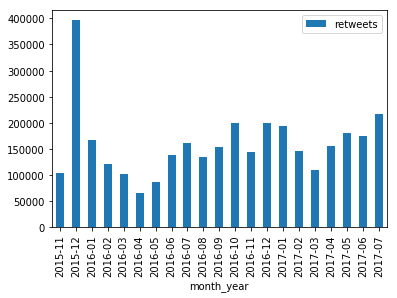

In [286]:
graph_df = twitter_archive_enhanced_final[["month_year","retweets"]]
test = graph_df.groupby("month_year").sum().plot(kind="bar")

In [287]:
twitter_archive_enhanced_final.to_csv('twitter_archive_master.csv')